In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from xml.etree import ElementTree as ET

plt.style.use('ggplot')

%matplotlib inline

In [306]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Importing the datasets

In [14]:
df_sales = pd.read_csv('datasets/real_property_sales_and_transfers.csv')

In [15]:
df_parcels = pd.read_csv('datasets/parcels.csv')

In [16]:
df_characteristics = pd.read_csv('datasets/real_property_residential_characteristics.csv', error_bad_lines=False)

Skipping line 63332: expected 46 fields, saw 47
Skipping line 63335: expected 46 fields, saw 47
Skipping line 63338: expected 46 fields, saw 47

Skipping line 68348: expected 46 fields, saw 48
Skipping line 69469: expected 46 fields, saw 47
Skipping line 69470: expected 46 fields, saw 47
Skipping line 69471: expected 46 fields, saw 47
Skipping line 69472: expected 46 fields, saw 47



## Filtering the data to only show single family homes

In [17]:
single_family_home_id = '113'
single_family_home_definition = 'SINGLE FAMILY'

df_sales = df_sales[df_sales.D_CLASS == single_family_home_id]

In [18]:
df_parcels = df_parcels[df_parcels.D_CLASS == single_family_home_id]

In [19]:
df_characteristics = df_characteristics[df_characteristics.D_CLASS_CN == single_family_home_definition]

## df_parcels Data Dictionary

In [20]:
parcels_document_tree = ET.parse( './datasets/parcels.xml' )

In [21]:
attributes = []
attr_definitions = []

for attribute in parcels_document_tree.iter('attr'):
    attributes.append(attribute.find('attrlabl').text)
    attr_definitions.append(attribute.find('attrdef').text)
    
parcels_data_dict = pd.DataFrame({'attribute': attributes,
                                  'definition': attr_definitions})

parcels_data_dict

,attribute,definition
0,OBJECTID,Internal feature number.
1,PIN,The replacement parcel number in the Manatron ...
2,SCHEDNUM,Assessment Parcel Schedule Number is a 13 digi...
3,MAPNUM,Assessment Index Map number - the first five d...
4,BLKNUM,Assessment Block Number - the sixth and sevent...
5,PARCELNUM,"Assessment Parcel Number - the eighth, ninth, ..."
6,APPENDAGE,Assessment Appendage Number - the last three d...
7,PARCEL_SOURCE,Contractor shifted parcel geometry for coincid...
8,SYSTEM_START_DATE,The date the parcel geometry entered into the ...
9,OWNER_NAME,Owner of Record.


## df_sales Data Dictionary

In [25]:
sales_dict = pd.read_excel('datasets/RealPropertyMetaData.xlsx', sheetname='Sales_Transfers', header=3, parse_cols=[1,2,3,5])
sales_dict

,Field Name,Example,Column Type,Description
0,PIN,163752899,Text,Assessor's Property Identification Number
1,SCHEDNUM,0231416005000,Text,Assessor's Schedule Number
2,RECEPTION_NUM,2011148564,Text,Clerk & Recorder's Reception Number
3,RECEPTION_DATE,20101004,Text,Clerk & Recorder's Reception Date
4,INSTRUMENT,WD,Text,Type of Instrument
5,SALE_YEAR,2010,Text,Sale Year
6,SALE_MONTHDAY,0928,Text,Sale Month/Day
7,SALE_PRICE,199677,Text,Sale Price
8,GRANTOR,"SMITH, JOHN & JANE",Text,Person(s) relinquishing ownership
9,GRANTEE,"BROWN, JAMES",Text,Person(s) recieving ownership


## df_characteristics Data Dictionary

In [26]:
characteristics_dict = pd.read_excel('datasets/RealPropertyMetaData.xlsx', sheetname='Residential_Characteristics', header=3, parse_cols=[1,2,3,5])
characteristics_dict

,Field Name,Example,Column Type,Description
0,PIN,161714761,Text,Assessor's Property Identification Number
1,SCHEDNUM,0226327008000,Text,Assessor's Schedule Number
2,CD,01,Text,Building Number
3,OFCARD,01,Text,Number of Buildings
4,OWNER,"SMITH, JOHN",Text,Owner
5,CO_OWNER,TYLER,Text,Co-Owner
6,OWNER_NUM,003650,Text,Street Mailing Number
7,OWNER_DIR,S,Text,Street Mailing Direction
8,OWNER_ST,YOSEMITE,Text,Street Mailing Street Name
9,OWNER_TYPE,ST,Text,Street Mailing Type


## Looking at summary statistics and the basic shape of the data

### *df_parcels* AKA: the dataset with the basic info on each parcel

In [31]:
df_parcels.shape

(84680, 62)

In [32]:
df_parcels.describe()

,PIN,SCHEDNUM,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,OWNER_ADDRESS_LINE2,OWNER_STR_NAME_PRE_MOD,OWNER_STR_NAME_PRE_TYPE,SITUS_ADDRESS_ID,SITUS_ADDRESS_LINE2,SITUS_STR_NAME_PRE_MOD,SITUS_STR_NAME_PRE_TYPE,SITUS_STR_NAME_POST_MOD,LAND_VALUE,IMPROVEMENT_VALUE,IMPROVEMENTS,PROP_CLASS,TOTAL_VALUE,LAND,DCL12,IMP_AREA,CCYRBLT,SALE_MONTHDAY,SALE_YEAR,SALE_PRICE
count,8.468000e+04,8.468000e+04,84653.000000,84653.000000,84653.000000,84653.000000,0.0,0.0,0.0,84447.000000,0.0,0.0,0.0,0.0,8.465700e+04,8.465700e+04,84657.000000,84657.000000,8.465700e+04,84675.000000,84680.0,84680.000000,84668.000000,76671.000000,76671.000000,5.378100e+04
mean,1.614567e+08,3.624098e+11,3623.820526,14.310857,15.396005,0.212207,NaN,NaN,NaN,89114.276659,NaN,NaN,NaN,NaN,1.163731e+05,1.411980e+05,11242.301003,1147.963275,2.575711e+05,6622.977266,11.0,1251.029617,1950.651557,634.708495,2005.830027,2.246357e+05
std,7.991908e+05,2.279490e+11,2279.597412,9.977237,15.353878,14.551307,NaN,NaN,NaN,69092.544573,NaN,NaN,NaN,NaN,9.738393e+04,7.409743e+04,5904.469386,539.151225,1.072444e+05,2869.185751,0.0,486.527351,39.326479,334.532109,12.181676,9.624427e+05
min,1.604314e+08,4.100122e+09,141.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,1112.000000,3.460000e+04,0.000000,11.0,0.000000,0.000000,101.000000,104.000000,1.000000e+00
25%,1.607884e+08,1.324410e+11,1324.000000,6.000000,6.000000,0.000000,NaN,NaN,NaN,34223.500000,NaN,NaN,NaN,NaN,5.050000e+04,9.450000e+04,7522.000000,1112.000000,1.734000e+05,5400.000000,11.0,926.000000,1930.000000,327.000000,2001.000000,1.000000e+01
50%,1.613910e+08,5.036270e+11,5036.000000,13.000000,13.000000,0.000000,NaN,NaN,NaN,89723.000000,NaN,NaN,NaN,NaN,7.500000e+04,1.334000e+05,10627.000000,1112.000000,2.356000e+05,6250.000000,11.0,1122.000000,1953.000000,618.000000,2007.000000,1.512000e+05
75%,1.618580e+08,5.263090e+11,5263.000000,21.000000,20.000000,0.000000,NaN,NaN,NaN,125887.500000,NaN,NaN,NaN,NaN,1.710000e+05,1.780000e+05,14169.000000,1112.000000,3.205000e+05,7500.000000,11.0,1447.000000,1968.000000,917.000000,2013.000000,2.409000e+05
max,1.640949e+08,9.131140e+11,9131.000000,67.000000,783.000000,998.000000,NaN,NaN,NaN,528900.000000,NaN,NaN,NaN,NaN,1.602500e+06,2.907900e+06,231469.000000,9279.000000,4.510400e+06,366283.000000,11.0,7004.000000,2016.000000,1231.000000,2016.000000,3.350000e+07


In [33]:
df_parcels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84680 entries, 24 to 225554
Data columns (total 62 columns):
PIN                         84680 non-null int64
SCHEDNUM                    84680 non-null int64
MAPNUM                      84653 non-null float64
BLKNUM                      84653 non-null float64
PARCELNUM                   84653 non-null float64
APPENDAGE                   84653 non-null float64
PARCEL_SOURCE               81689 non-null object
SYSTEM_START_DATE           84680 non-null object
OWNER_NAME                  84660 non-null object
OWNER_ADDRESS_LINE1         84660 non-null object
OWNER_ADDRESS_LINE2         0 non-null float64
OWNER_ADDR_NBR_PREFIX       0 non-null object
OWNER_ADDR_NBR              84659 non-null object
OWNER_ADDR_NBR_SUFFIX       12 non-null object
OWNER_STR_NAME_PRE_MOD      0 non-null float64
OWNER_STR_NAME_PRE_DIR      43821 non-null object
OWNER_STR_NAME_PRE_TYPE     0 non-null float64
OWNER_STR_NAME              84660 non-null object
OWN

### *df_sales* AKA: the dataset with the home sales info

In [34]:
df_sales.shape

(74221, 16)

In [35]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74221 entries, 38 to 234014
Data columns (total 16 columns):
SCHEDNUM          74221 non-null int64
RECEPTION_NUM     74221 non-null object
INSTRUMENT        74221 non-null object
SALE_YEAR         74221 non-null int64
SALE_MONTHDAY     74221 non-null int64
RECEPTION_DATE    74221 non-null int64
SALE_PRICE        49205 non-null float64
GRANTOR           74221 non-null object
GRANTEE           74221 non-null object
CLASS             74221 non-null object
MKT_CLUS          74212 non-null float64
D_CLASS           74221 non-null object
D_CLASS_CN        74221 non-null object
NBHD_1            74221 non-null int64
NBHD_1_CN         74221 non-null object
PIN               74221 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 9.6+ MB


In [36]:
df_sales.describe()

,SCHEDNUM,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,MKT_CLUS,NBHD_1,PIN
count,7.422100e+04,74221.000000,74221.000000,7.422100e+04,4.920500e+04,74212.000000,74221.000000,7.422100e+04
mean,3.300750e+11,2011.727234,659.805203,2.011868e+07,3.979828e+05,14.462324,334.796068,1.615791e+08
std,2.361227e+11,2.649423,332.156548,2.652223e+04,1.774349e+06,10.052962,250.564454,9.303221e+05
min,4.100122e+09,2008.000000,101.000000,1.990081e+07,1.000000e+00,1.000000,1.000000,1.604314e+08
25%,1.165070e+11,2009.000000,407.000000,2.009110e+07,7.500000e+04,6.000000,109.000000,1.607881e+08
50%,2.351300e+11,2012.000000,627.000000,2.012051e+07,1.805000e+05,13.000000,259.000000,1.614388e+08
75%,5.233060e+11,2014.000000,923.000000,2.014091e+07,2.910000e+05,23.000000,541.000000,1.619761e+08
max,9.131140e+11,2016.000000,1231.000000,2.016091e+07,3.350000e+07,56.000000,906.000000,1.640949e+08


In [37]:
df_sales.D_CLASS_CN.value_counts()

SINGLE FAMILY    74221
Name: D_CLASS_CN, dtype: int64

### df_characteristics AKA the dataset with the characteristics of the property

In [38]:
df_characteristics.shape

(131640, 46)

In [39]:
df_characteristics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131640 entries, 0 to 199731
Data columns (total 46 columns):
PIN                 131640 non-null int64
SCHEDNUM            131640 non-null int64
CD                  131640 non-null int64
OFCARD              131640 non-null int64
OWNER               131640 non-null object
CO_OWNER            2651 non-null object
OWNER_NUM           131640 non-null object
OWNER_DIR           70057 non-null object
OWNER_ST            131640 non-null object
OWNER_TYPE          128336 non-null object
OWNER_APT           4717 non-null object
OWNER_CITY          131640 non-null object
OWNER_STATE         131639 non-null object
OWNER_ZIP           131634 non-null object
SITE_NBR            131640 non-null int64
SITE_DIR            74512 non-null object
SITE_NAME           131640 non-null object
SITE_MODE           131597 non-null object
SITE_MORE           1666 non-null object
TAX_DIST            131640 non-null object
PROP_CLASS          131639 non-null float6

In [40]:
df_characteristics.describe()

,PIN,SCHEDNUM,CD,OFCARD,SITE_NBR,PROP_CLASS,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,GRD_AREA,STORY,BED_RMS,FULL_B,HLF_B,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1
count,1.316400e+05,1.316400e+05,131640.0,131640.000000,131640.000000,131639.000000,131623.000000,131640.000000,131640.000000,131640.000000,131640.000000,131640.000000,131640.000000,131625.000000,131625.000000,131625.000000,131625.000000,131640.000000,1.316390e+05,1.316390e+05,131639.000000,131639.000000,131639.000000,131639.000000,131640.000000
mean,1.615375e+08,3.943676e+11,1.0,1.002978,3600.228851,1139.693791,6887.373651,1489.297129,671.045943,380.999218,38.155963,1.290068,2.784845,1.895020,0.315639,1951.716862,617.746294,1.027925,1.549733e+05,3.592385e+05,12339.774087,28602.434529,28502.675651,100.683019,403.264304
std,8.285440e+05,2.274046e+11,0.0,0.094791,3840.690532,473.359897,3670.260932,782.577253,552.215525,475.986018,156.434972,0.454353,0.845079,0.886416,0.500216,32.779802,925.027109,0.285891,1.567984e+05,2.905924e+05,12491.454724,23143.031543,23101.119558,2755.915865,240.839512
min,1.604314e+08,4.100122e+09,1.0,1.000000,1.000000,1112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1873.000000,0.000000,0.000000,0.000000e+00,3.460000e+04,0.000000,2754.000000,0.000000,0.000000,1.000000
25%,1.608711e+08,2.184110e+11,1.0,1.000000,1357.000000,1112.000000,5350.000000,974.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1927.000000,0.000000,1.000000,5.620000e+04,1.938000e+05,4474.000000,15426.000000,15360.000000,0.000000,205.000000
50%,1.614421e+08,5.085090e+11,1.0,1.000000,2747.000000,1112.000000,6250.000000,1245.000000,754.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,1953.000000,0.000000,1.000000,9.690000e+04,2.914000e+05,7713.000000,23196.000000,23150.000000,0.000000,520.000000
75%,1.619073e+08,5.303080e+11,1.0,1.000000,4459.000000,1112.000000,7680.000000,1764.000000,1051.000000,768.000000,0.000000,2.000000,3.000000,2.000000,1.000000,1971.000000,1997.000000,1.000000,2.186000e+05,4.223500e+05,17401.000000,33623.000000,33580.000000,0.000000,588.000000
max,1.640952e+08,9.145050e+11,1.0,25.000000,21680.000000,9279.000000,366283.000000,18231.000000,8896.000000,7565.000000,3350.000000,3.000000,15.000000,9.000000,5.000000,2016.000000,3994.000000,10.000000,8.690200e+06,1.009460e+07,691740.000000,803530.000000,803530.000000,380430.000000,906.000000


## Looking at one schedule number (piece of property) across all three datasets

In [41]:
df_sales[df_sales.SCHEDNUM == 23307028000]

,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,MKT_CLUS,D_CLASS,D_CLASS_CN,NBHD_1,NBHD_1_CN,PIN
18205,23307028000,2016099458,WD,2016,722,20160728,330000.0,"WASHINGTON,QUIANA","PHIFER,DONALD & NICOLE",R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18206,23307028000,2012005557,SW,2011,1215,20120117,185000.0,NAVY FEDERAL CREDIT UNION,"WASHINGTON,QUIANA",R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18207,23307028000,2010142026,QC,2010,1124,20101207,NaN,"NADOL,DAVID J & THERESE J","NADOL,THERESE J",R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18208,23307028000,2011096228,PT,2011,829,20110829,NaN,"NADOL,THERESE J",NAVY FEDERAL CREDIT UNION,R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18209,23307028000,2015111855,QC,2015,807,20150811,1.0,"WASHINGTON,QUIANA","WASHINGTON,QUIANA",R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499


In [42]:
df_parcels[df_parcels.SCHEDNUM == 23307028000]

,PIN,SCHEDNUM,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,PARCEL_SOURCE,SYSTEM_START_DATE,OWNER_NAME,OWNER_ADDRESS_LINE1,OWNER_ADDRESS_LINE2,OWNER_ADDR_NBR_PREFIX,OWNER_ADDR_NBR,OWNER_ADDR_NBR_SUFFIX,OWNER_STR_NAME_PRE_MOD,OWNER_STR_NAME_PRE_DIR,OWNER_STR_NAME_PRE_TYPE,OWNER_STR_NAME,OWNER_STR_NAME_POST_TYPE,OWNER_STR_NAME_POST_DIR,OWNER_STR_NAME_POST_MOD,OWNER_UNIT_TYPE,OWNER_UNIT_IDENT,OWNER_CITY,OWNER_STATE,OWNER_ZIP,SITUS_ADDRESS_ID,SITUS_ADDRESS_LINE1,SITUS_ADDRESS_LINE2,SITUS_CITY,SITUS_STATE,SITUS_ZIP,SITUS_ADDR_NBR,SITUS_ADDR_NBR_SUFFIX,SITUS_STR_NAME_PRE_MOD,SITUS_STR_NAME_PRE_DIR,SITUS_STR_NAME_PRE_TYPE,SITUS_STR_NAME,SITUS_STR_NAME_POST_TYPE,SITUS_STR_NAME_POST_DIR,SITUS_STR_NAME_POST_MOD,SITUS_UNIT_TYPE,SITUS_UNIT_IDENT,TAX_DIST,LAND_VALUE,IMPROVEMENT_VALUE,IMPROVEMENTS,PROP_CLASS,TOTAL_VALUE,LAND,D_CLASS,D_CLASS_CN,DCL12,ACT_ZONE,IMP_AREA,CCYRBLT,ASAL_INSTR,SALE_MONTHDAY,SALE_YEAR,SALE_PRICE,RECEPTION_NUM,GLOBALID
6864,162802499,23307028000,233.0,7.0,28.0,0.0,,2010-12-08 00:00:00,"PHIFER,DONALD & NICOLE",4063 JERICHO ST,NaN,NaN,4063,NaN,NaN,NaN,NaN,JERICHO,ST,NaN,NaN,NaN,NaN,DENVER,CO,80249-8184,158730.0,4063 JERICHO ST,NaN,DENVER,CO,80249-8184,4063,NaN,NaN,NaN,NaN,JERICHO,ST,NaN,NaN,NaN,NaN,149C,37400.0,224800.0,17894.0,1112.0,262200.0,5406.0,113,SINGLE FAMILY,11.0,R-2-A,2144.0,2000.0,QC,807.0,2015.0,1.0,2015111855,{00000000-0000-0000-0000-000000000000}


In [43]:
df_characteristics[df_characteristics.SCHEDNUM == 23307028000]

,PIN,SCHEDNUM,CD,OFCARD,OWNER,CO_OWNER,OWNER_NUM,OWNER_DIR,OWNER_ST,OWNER_TYPE,OWNER_APT,OWNER_CITY,OWNER_STATE,OWNER_ZIP,SITE_NBR,SITE_DIR,SITE_NAME,SITE_MODE,SITE_MORE,TAX_DIST,PROP_CLASS,PROPERTY_CLASS,ZONE10,D_CLASS_CN,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,GRD_AREA,STORY,STYLE_CN,BED_RMS,FULL_B,HLF_B,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1,NBHD_1_CN,LEGL_DESCRIPTION
14053,162802499,23307028000,1,1,"PHIFER,DONALD AND NICOLE",NaN,4063,NaN,JERICHO,ST,NaN,DENVER,CO,80249-8184,4063,NaN,JERICHO,ST,NaN,149C,1112.0,Single Family Residential,R-2-A,SINGLE FAMILY,5406.0,2144,1074,967,0,2.0,TWO-STORY,3,3.0,1.0,2000.0,2004.0,1,37400.0,262200.0,2977.0,20871.0,20870.0,0.0,3,GREEN VALLEY,GREEN VALLEY RANCH FLG #26 B5 L28


## Combining the dataframes

In [44]:
df_merge = df_sales.merge(df_parcels, how='left', on='SCHEDNUM')

In [45]:
df_merge = df_merge.merge(df_characteristics, how='left', on='SCHEDNUM')

## Looking over the new dataframe for any problems

In [46]:
df_merge.describe()

,SCHEDNUM,SALE_YEAR_x,SALE_MONTHDAY_x,RECEPTION_DATE,SALE_PRICE_x,MKT_CLUS,NBHD_1_x,PIN_x,PIN_y,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,OWNER_ADDRESS_LINE2,OWNER_STR_NAME_PRE_MOD,OWNER_STR_NAME_PRE_TYPE,SITUS_ADDRESS_ID,SITUS_ADDRESS_LINE2,SITUS_STR_NAME_PRE_MOD,SITUS_STR_NAME_PRE_TYPE,SITUS_STR_NAME_POST_MOD,LAND_VALUE,IMPROVEMENT_VALUE,IMPROVEMENTS,PROP_CLASS_x,TOTAL_VALUE_x,LAND,DCL12,IMP_AREA,CCYRBLT_x,SALE_MONTHDAY_y,SALE_YEAR_y,SALE_PRICE_y,PIN,CD,OFCARD,SITE_NBR,PROP_CLASS_y,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,GRD_AREA,STORY,BED_RMS,FULL_B,HLF_B,CCYRBLT_y,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE_y,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y
count,7.422100e+04,74221.000000,74221.000000,7.422100e+04,4.920500e+04,74212.000000,74221.000000,7.422100e+04,7.419400e+04,74185.000000,74185.000000,74185.000000,74185.0,0.0,0.0,0.0,74005.000000,0.0,0.0,0.0,0.0,7.419100e+04,74191.000000,74191.000000,74191.000000,7.419100e+04,74190.000000,74194.0,74194.000000,74177.000000,73658.000000,73658.000000,5.089200e+04,7.419400e+04,74194.0,74194.000000,74194.000000,74194.000000,74190.000000,74194.000000,74194.000000,74194.000000,74194.000000,74194.000000,74194.000000,74177.000000,74177.000000,74177.000000,74177.000000,74194.000000,7.419400e+04,7.419400e+04,74194.000000,74194.000000,74194.000000,74194.000000,74194.000000
mean,3.300750e+11,2011.727234,659.805203,2.011868e+07,3.979828e+05,14.462324,334.796068,1.615791e+08,1.615789e+08,3300.131199,14.452329,15.428429,0.0,NaN,NaN,NaN,97823.102371,NaN,NaN,NaN,NaN,1.040286e+05,150485.227319,11979.208543,1114.842663,2.545138e+05,6435.430071,11.0,1284.230544,1956.389892,604.067012,2012.121535,2.378206e+05,1.615790e+08,1.0,1.001779,4519.296924,1114.842548,6435.259779,1284.232027,521.561892,292.069992,41.326024,1.249629,2.702213,1.738639,0.265325,1956.389164,491.082249,1.025123,1.040168e+05,2.545047e+05,8281.061811,20260.487802,20250.630644,10.796628,334.766261
std,2.361227e+11,2.649423,332.156548,2.652223e+04,1.774349e+06,10.052962,250.564454,9.303221e+05,9.300915e+05,2361.415282,10.384402,15.014975,0.0,NaN,NaN,NaN,84508.901035,NaN,NaN,NaN,NaN,9.157691e+04,77125.466645,6138.988688,151.798683,1.073185e+05,2334.482642,0.0,521.626277,33.101279,336.922972,3.165865,7.897509e+05,9.302063e+05,0.0,0.043712,4943.135983,151.795615,2334.405309,521.700710,482.291476,398.655302,157.129115,0.432389,0.757396,0.690535,0.449888,33.105469,861.420152,0.249139,9.155052e+04,1.072965e+05,7293.350188,8547.225300,8543.449814,690.785562,250.586779
min,4.100122e+09,2008.000000,101.000000,1.990081e+07,1.000000e+00,1.000000,1.000000,1.604314e+08,1.604314e+08,141.000000,0.000000,1.000000,0.0,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,1112.000000,3.460000e+04,0.000000,11.0,0.000000,1873.000000,101.000000,1969.000000,1.000000e+00,1.604314e+08,1.0,1.000000,1.000000,1112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1873.000000,0.000000,0.000000,0.000000e+00,3.460000e+04,0.000000,2754.000000,0.000000,0.000000,1.000000
25%,1.165070e+11,2009.000000,407.000000,2.009110e+07,7.500000e+04,6.000000,109.000000,1.607881e+08,1.607880e+08,1165.000000,6.000000,6.000000,0.0,NaN,NaN,NaN,32766.000000,NaN,NaN,NaN,NaN,4.120000e+04,100700.000000,8024.000000,1112.000000,1.727000e+05,5023.000000,11.0,931.000000,1941.000000,315.000000,2010.000000,6.000000e+04,1.607880e+08,1.0,1.000000,1636.000000,1112.000000,5023.500000,931.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1941.000000,0.000000,1.000000,4.120000e+04,1.727000e+05,3280.000000,13747.000000,13750.000000,0.000000,109.000000
50%,2.351300e+11,2012.000000,627.000000,2.012051e+07,1.805000e+05,13.000000,259.000000,1.614388e+08,1.614387e+08,2351.000000,13.000000,13.000000,0.0,NaN,NaN,NaN,93132.000000,NaN,NaN,NaN,NaN,6.390000e+04,141100.000000,11232.000000,1112.000000,2.274000e+05,6250.000000,11.0,1137.000000,1954.000000,605.000000,2013.000000,1.900000e+05,1.614389e+08,1.0,1.000000,3055.000000,1112.000

In [48]:
df_merge.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74221 entries, 0 to 74220
Data columns (total 122 columns):
SCHEDNUM                    74221 non-null int64
RECEPTION_NUM_x             74221 non-null object
INSTRUMENT                  74221 non-null object
SALE_YEAR_x                 74221 non-null int64
SALE_MONTHDAY_x             74221 non-null int64
RECEPTION_DATE              74221 non-null int64
SALE_PRICE_x                49205 non-null float64
GRANTOR                     74221 non-null object
GRANTEE                     74221 non-null object
CLASS                       74221 non-null object
MKT_CLUS                    74212 non-null float64
D_CLASS_x                   74221 non-null object
D_CLASS_CN_x                74221 non-null object
NBHD_1_x                    74221 non-null int64
NBHD_1_CN_x                 74221 non-null object
PIN_x                       74221 non-null int64
PIN_y                       74194 non-null float64
MAPNUM                      74185 non-null 

## Dropping columns with no data or fewer than 500 entries

In [52]:
df_merge.drop(['OWNER_ADDRESS_LINE2',
               'OWNER_ADDR_NBR_PREFIX',
               'OWNER_ADDR_NBR_SUFFIX',
               'OWNER_STR_NAME_PRE_MOD',
               'OWNER_STR_NAME_PRE_TYPE',
               'OWNER_STR_NAME_POST_DIR',
               'OWNER_STR_NAME_POST_MOD',
               'SITUS_ADDRESS_LINE2',
               'SITUS_ADDR_NBR_SUFFIX',
               'SITUS_STR_NAME_PRE_MOD',
               'SITUS_STR_NAME_PRE_TYPE',
               'SITUS_STR_NAME_POST_DIR',
               'SITUS_STR_NAME_POST_MOD',
               'SITUS_UNIT_TYPE',
               'SITUS_UNIT_IDENT',
               'SITE_MORE'], axis=1, inplace=True)

In [53]:
df_merge.iloc[1]

SCHEDNUM                                               14101001000
RECEPTION_NUM_x                                         2015157653
INSTRUMENT                                                      WD
SALE_YEAR_x                                                   2015
SALE_MONTHDAY_x                                               1102
RECEPTION_DATE                                            20151109
SALE_PRICE_x                                                415000
GRANTOR                                      PADBURY,CHRISTOPHER R
GRANTEE                                       MACIEL,HORACIO PEREZ
CLASS                                                            R
MKT_CLUS                                                         6
D_CLASS_x                                                      113
D_CLASS_CN_x                                         SINGLE FAMILY
NBHD_1_x                                                         5
NBHD_1_CN_x                                         N GREEN VA

## Creating a datetime column from the data and making it the index

In [54]:
days = []
months = []
years = df_merge.SALE_YEAR_x.astype(str)
datetimes = []

for row in df_merge.SALE_MONTHDAY_x:
    row = str(row)
    if len(row) < 4:
        row = '0' + row
    days.append(row[:-2])
    months.append(row[2:])
    


In [55]:
df_merge['date'] = years + '-' + months + '-' + days

In [56]:
df_merge['date'] = pd.to_datetime(df_merge['date'], format='%Y-%d-%m')

In [57]:
df_merge.index = df_merge.date

In [153]:
df_merge['year'] = df_merge.index.year
df_merge['month'] = df_merge.index.month
df_merge['day'] = df_merge.index.day

## Ordering the observations by date

In [154]:
df_merge.sort_values('date', inplace=True)

## Different Instrument Types

I'm still looking for a complete list of definitions for the deed instrument types, but the most frequent ones are:

| Code | Deed Instrument Type | Definition |
|------|----------------------|------------|
| WD   | Warranty Deed        | A deed in which the grantor (seller) guarantees that he or she holds clear title to a piece of real estate and has a right to sell it to you. The guarantee is not limited to the time the grantor owned the property - it extends back to the property's origins. |
| QC   | Quitclaim Deed       | A deed given to convey whatever right, title, or interest the grantor may have, if any, in a piece of real property. The grantor does not warrant that he or she does in fact have interest to the property. |
| SW   | Special Warranty     | A deed in which the grantor warrants the title for the period of time in which he held title, but does not warrant it with regard to previous owners. |
| PT   | ???                  | ??? |
| PR   | ???                  | ??? |
| DC   | ???                  | ??? |

Definitions from http://www.ocpafl.org/searches/lookups.aspx/code/deed

In [86]:
df_merge.groupby('INSTRUMENT').size().sort_values(ascending=False)

INSTRUMENT
WD    34386
QC    18138
SW     7507
PT     7390
PR     2963
DC     2244
BS      435
TR      230
PS      182
DD      178
BF      139
BG       97
CS       94
PC       50
DS       42
ST       28
GR       27
SF       18
DE       14
DF       12
AF       10
AD        9
CD        7
PB        7
TS        5
RC        4
RV        2
BK        1
SC        1
NC        1
dtype: int64

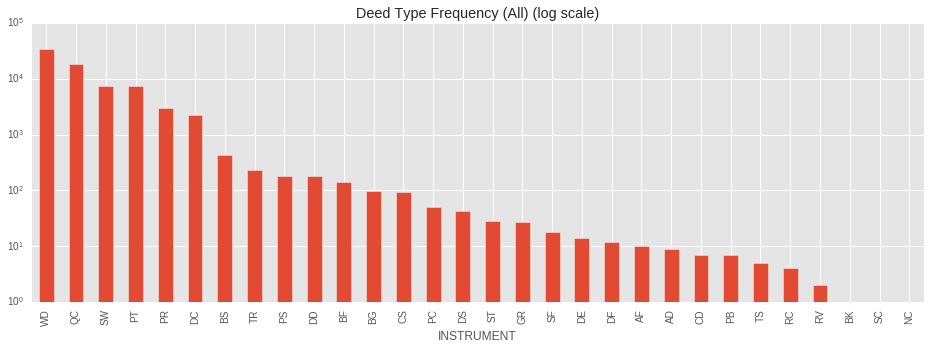

In [132]:
df_merge.groupby('INSTRUMENT').size().sort_values(ascending=False).plot('bar', 
                                                                        figsize=(16,5), 
                                                                        logy=True, 
                                                                        title="Deed Type Frequency (All) (log scale)")

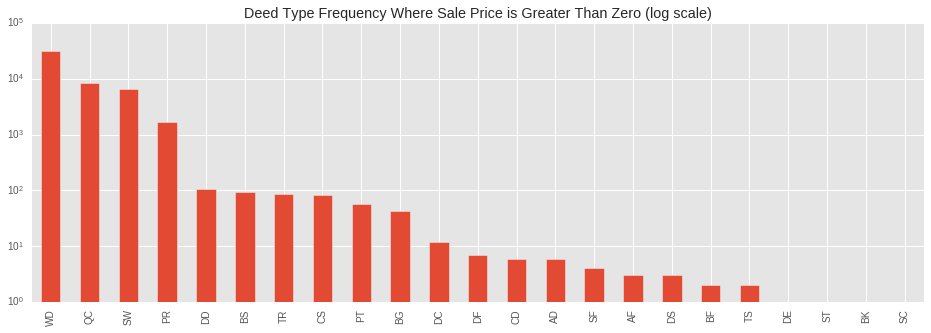

In [212]:
df_merge[df_merge.SALE_PRICE_x > 0]['INSTRUMENT'].value_counts().plot('bar', figsize=(16,5), logy=True,
                                                                      title='Deed Type Frequency Where Sale Price is Greater Than Zero (log scale)');

---

# Looking at Outliers in Sale Prices

Looking at the mean of home sale prices each year, two stand out--2010 and 2013. In 2010 there are several entries in the *SALE_PRICE_x* column (from real_property_sales_and_transfers.csv) in 2010 that seem to be erronious. 

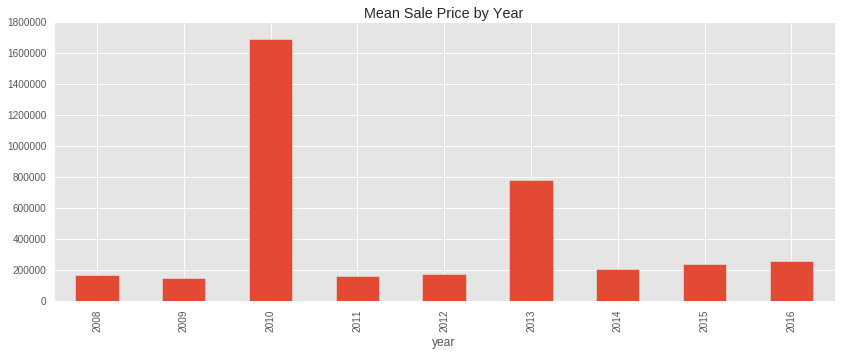

In [359]:
df_sold_houses = df_merge[df_merge.SALE_PRICE_x > 0]

df_sold_houses.groupby('year')['SALE_PRICE_x'].mean().plot('bar', figsize=(14,5), title="Mean Sale Price by Year")

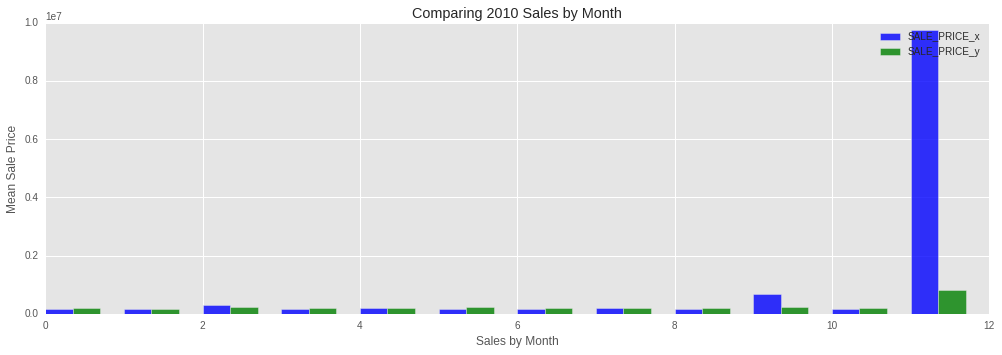

In [205]:
# data to plot
n_groups = 12
means_x = df_sold_houses[df_sold_houses.year == 2010].groupby('month')['SALE_PRICE_x'].mean()
means_y = df_sold_houses[df_sold_houses.year == 2010].groupby('month')['SALE_PRICE_y'].mean()
 
# create plot
fig, ax = plt.subplots(figsize=(14,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_x, bar_width,
                 alpha=opacity,
                 color='b',
                 label='SALE_PRICE_x')
 
rects2 = plt.bar(index + bar_width, means_y, bar_width,
                 alpha=opacity,
                 color='g',
                 label='SALE_PRICE_y')
 
plt.xlabel('Sales by Month')
plt.ylabel('Mean Sale Price')
plt.title('Comparing 2010 Sales by Month')
plt.legend()
 
plt.tight_layout()
plt.show()

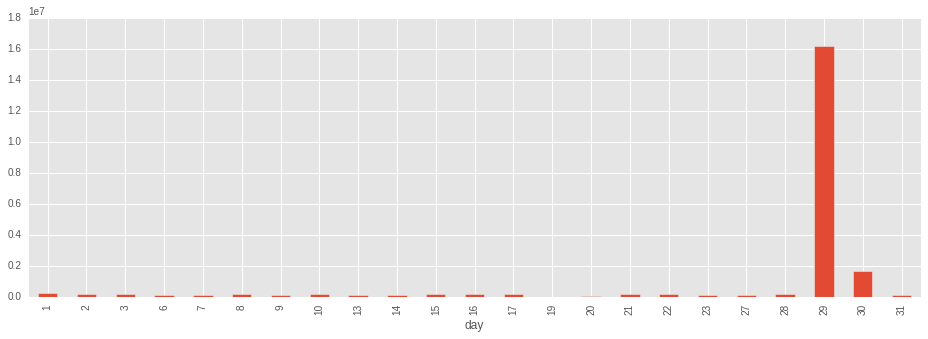

In [263]:
df_sold_houses[(df_sold_houses.year == 2010) & (df_sold_houses.month == 12)].groupby('day').SALE_PRICE_x.mean().plot('bar', figsize=(16, 5))

In [272]:
sales_outliers_2010_params = (df_sold_houses.year == 2010) & (df_sold_houses.month == 12) & (df_sold_houses.SALE_PRICE_x > 600000)

In [273]:
df_sold_houses[['SCHEDNUM', 'SALE_PRICE_x', 'SALE_PRICE_y', 'CCYRBLT_x', 'day']][sales_outliers_2010_params].groupby('day').mean()

,SCHEDNUM,SALE_PRICE_x,SALE_PRICE_y,CCYRBLT_x
day,,,,
29,14742667181,17113000.0,1.123679e+06,2012.552632
30,14154012500,17113000.0,2.308750e+05,2012.000000


In [322]:
outliers_2010 = df_sold_houses[['SCHEDNUM', 'NBHD_1_CN_x', 'SALE_PRICE_x', 'SALE_PRICE_y', 'day']][(df_sold_houses.year == 2010) & (df_sold_houses.month == 12) & (df_sold_houses.SALE_PRICE_x > 500000)]
outliers_2010.groupby('NBHD_1_CN_x').size()

NBHD_1_CN_x
GREEN VALLEY       18
N GREEN VALLEY    365
dtype: int64

In [307]:
df_sold_houses[['SALE_PRICE_x', 'SALE_PRICE_y']][df_sold_houses['NBHD_1_CN_x'] == 'N GREEN VALLEY'].mean()

SALE_PRICE_x   2077904.946
SALE_PRICE_y    575748.777
dtype: float64

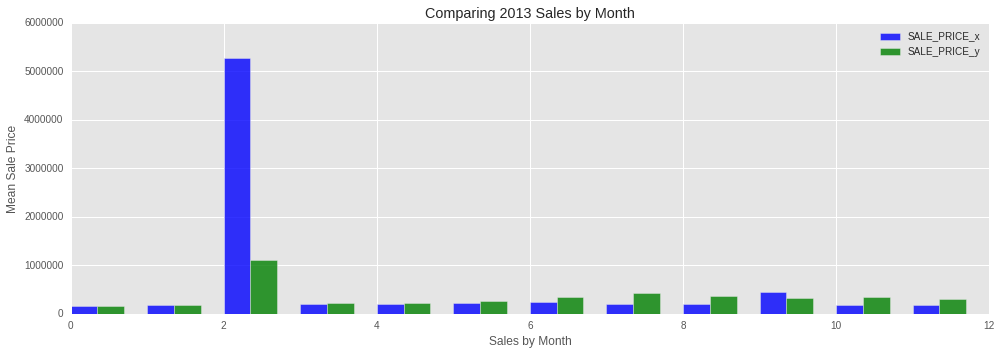

In [206]:
# data to plot
n_groups = 12
means_x = df_sold_houses[df_sold_houses.year == 2013].groupby('month')['SALE_PRICE_x'].mean()
means_y = df_sold_houses[df_sold_houses.year == 2013].groupby('month')['SALE_PRICE_y'].mean()
 
# create plot
fig, ax = plt.subplots(figsize=(14,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_x, bar_width,
                 alpha=opacity,
                 color='b',
                 label='SALE_PRICE_x')
 
rects2 = plt.bar(index + bar_width, means_y, bar_width,
                 alpha=opacity,
                 color='g',
                 label='SALE_PRICE_y')
 
plt.xlabel('Sales by Month')
plt.ylabel('Mean Sale Price')
plt.title('Comparing 2013 Sales by Month')
plt.legend()
 
plt.tight_layout()
plt.show()

In [268]:
sales_outliers_2013_params = (df_sold_houses.year == 2013) & (df_sold_houses.month == 3) & (df_sold_houses.SALE_PRICE_x > 600000)

In [269]:
df_sold_houses[['SCHEDNUM', 'SALE_PRICE_x', 'SALE_PRICE_y', 'CCYRBLT_x', 'day']][sales_outliers_2013_params].groupby('day').mean()

,SCHEDNUM,SALE_PRICE_x,SALE_PRICE_y,CCYRBLT_x
day,,,,
1,21108773475,14606000.0,2.708026e+06,2013.725962


In [365]:
outliers_2013 = df_sold_houses[['SCHEDNUM','NBHD_1_CN_x', 'SALE_PRICE_x', 'SALE_PRICE_y', 'day']][sales_outliers_2013_params]
outliers_2013.groupby('NBHD_1_CN_x').size()
outliers_2013.shape

(208, 5)

## Dropping the outliers (for now)

In [334]:
df_sold_houses.shape

(49205, 110)

In [377]:
rows_to_drop = sales_outliers_2013_params | sales_outliers_2010_params

In [380]:
df_sold_houses = df_sold_houses[~rows_to_drop]

## Re-comparing the sales columns from the two datasets

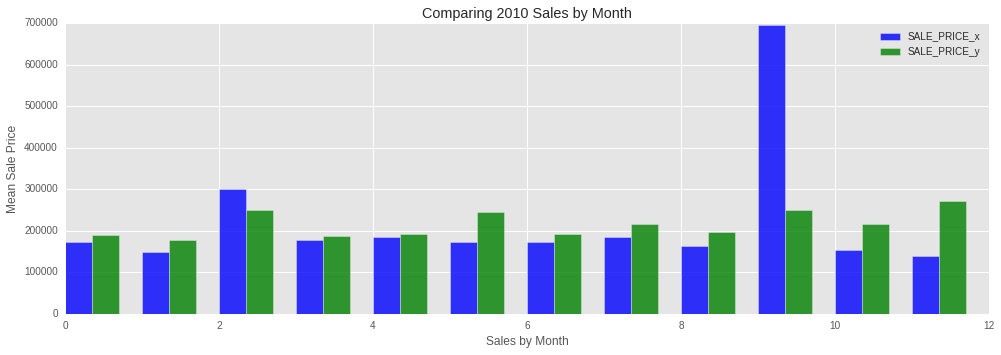

In [381]:
# data to plot
n_groups = 12
means_x = df_sold_houses[df_sold_houses.year == 2010].groupby('month')['SALE_PRICE_x'].mean()
means_y = df_sold_houses[df_sold_houses.year == 2010].groupby('month')['SALE_PRICE_y'].mean()
 
# create plot
fig, ax = plt.subplots(figsize=(14,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_x, bar_width,
                 alpha=opacity,
                 color='b',
                 label='SALE_PRICE_x')
 
rects2 = plt.bar(index + bar_width, means_y, bar_width,
                 alpha=opacity,
                 color='g',
                 label='SALE_PRICE_y')
 
plt.xlabel('Sales by Month')
plt.ylabel('Mean Sale Price')
plt.title('Comparing 2010 Sales by Month')
plt.legend()
 
plt.tight_layout()
plt.show()

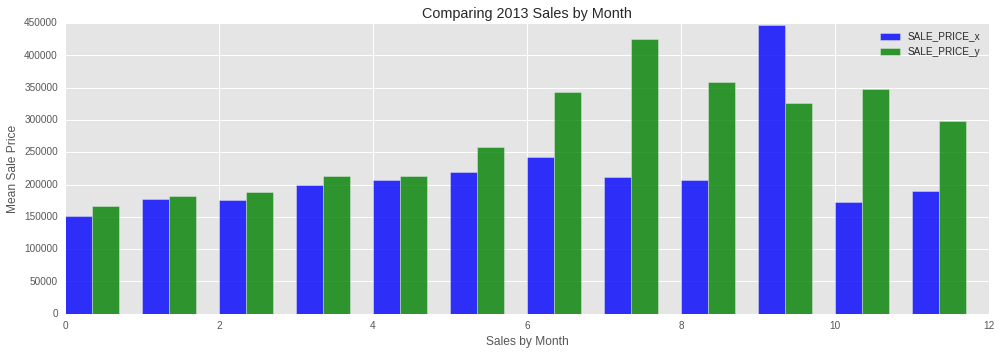

In [382]:
# data to plot
n_groups = 12
means_x = df_sold_houses[df_sold_houses.year == 2013].groupby('month')['SALE_PRICE_x'].mean()
means_y = df_sold_houses[df_sold_houses.year == 2013].groupby('month')['SALE_PRICE_y'].mean()
 
# create plot
fig, ax = plt.subplots(figsize=(14,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_x, bar_width,
                 alpha=opacity,
                 color='b',
                 label='SALE_PRICE_x')
 
rects2 = plt.bar(index + bar_width, means_y, bar_width,
                 alpha=opacity,
                 color='g',
                 label='SALE_PRICE_y')
 
plt.xlabel('Sales by Month')
plt.ylabel('Mean Sale Price')
plt.title('Comparing 2013 Sales by Month')
plt.legend()
 
plt.tight_layout()
plt.show()

## Looking at the transactions by year

In [117]:
df_merge[df_merge.year == 2015].INSTRUMENT.value_counts()

WD    5565
QC    2401
PR     458
DC     212
SW     208
PT      98
BS      69
TR      31
PS      27
BF      26
DD      20
CS      19
PC       9
DS       6
GR       3
CD       2
BG       1
TS       1
DF       1
SF       1
Name: INSTRUMENT, dtype: int64

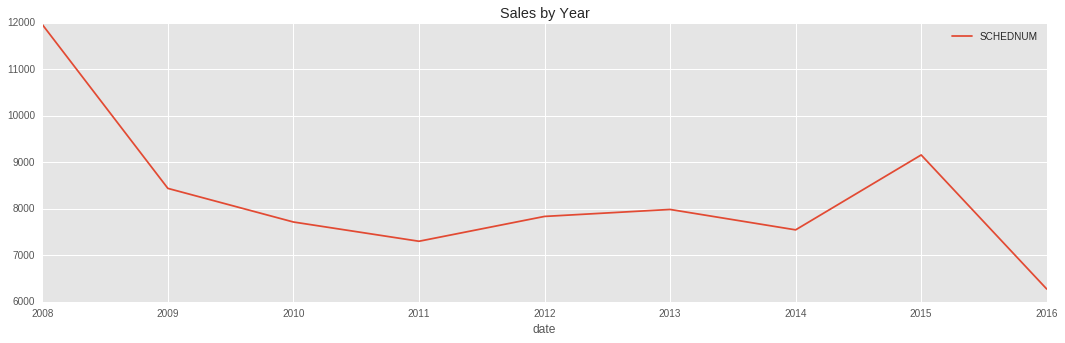

In [39]:
df_yearly_sales = df_merge[['SCHEDNUM']].resample('A').count()

axis = df_yearly_sales.plot(figsize=(18, 5));

axis.set_title("Sales by Year")

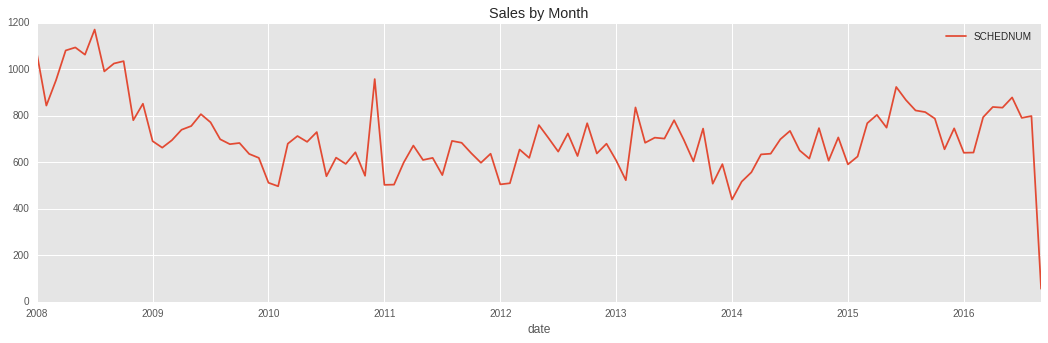

In [40]:
df_monthly_sales = df_merge[['SCHEDNUM']].resample('M').count()

axis = df_monthly_sales.plot(figsize=(18, 5));

axis.set_title("Sales by Month")

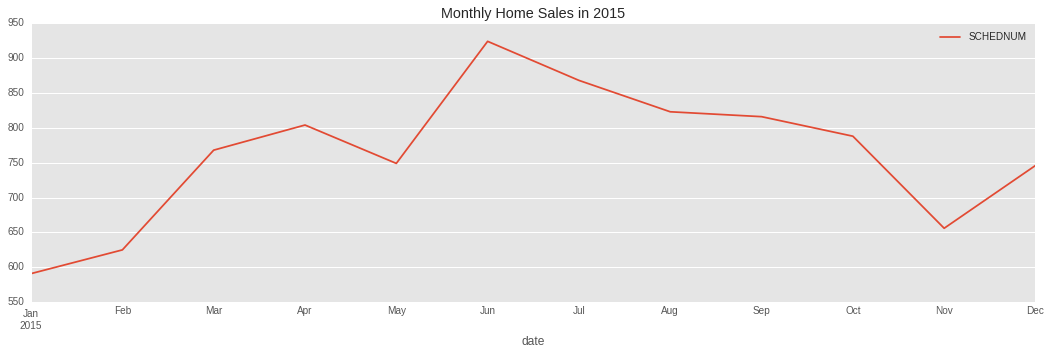

In [41]:
sales_in_2015 = df_merge[['SCHEDNUM']][(df_merge.year == 2015)].resample('M').count()

axis = sales_in_2015.plot(figsize=(18,5));

axis.set_title("Monthly Home Sales in 2015")

In [55]:
for column in df_merge:
    print column, df_merge[column].count()

SCHEDNUM 74221
RECEPTION_NUM_x 74221
INSTRUMENT 74221
SALE_YEAR_x 74221
SALE_MONTHDAY_x 74221
RECEPTION_DATE 74221
SALE_PRICE_x 49205
GRANTOR 74221
GRANTEE 74221
CLASS 74221
MKT_CLUS 74212
D_CLASS_x 74221
D_CLASS_CN_x 74221
NBHD_1_x 74221
NBHD_1_CN_x 74221
PIN_x 74221
PIN_y 74194
MAPNUM 74185
BLKNUM 74185
PARCELNUM 74185
APPENDAGE 74185
PARCEL_SOURCE 70694
SYSTEM_START_DATE 74194
OWNER_NAME 74193
OWNER_ADDRESS_LINE1 74193
OWNER_ADDRESS_LINE2 0
OWNER_ADDR_NBR_PREFIX 0
OWNER_ADDR_NBR 74192
OWNER_ADDR_NBR_SUFFIX 10
OWNER_STR_NAME_PRE_MOD 0
OWNER_STR_NAME_PRE_DIR 36613
OWNER_STR_NAME_PRE_TYPE 0
OWNER_STR_NAME 74193
OWNER_STR_NAME_POST_TYPE 71934
OWNER_STR_NAME_POST_DIR 182
OWNER_STR_NAME_POST_MOD 0
OWNER_UNIT_TYPE 3674
OWNER_UNIT_IDENT 3876
OWNER_CITY_x 74193
OWNER_STATE_x 74193
OWNER_ZIP_x 74188
SITUS_ADDRESS_ID 74005
SITUS_ADDRESS_LINE1 74194
SITUS_ADDRESS_LINE2 0
SITUS_CITY 74194
SITUS_STATE 74194
SITUS_ZIP 72418
SITUS_ADDR_NBR 74194
SITUS_ADDR_NBR_SUFFIX 0
SITUS_STR_NAME_PRE_MOD 0
SITU

In [56]:
df_wd = df_merge[df_merge.INSTRUMENT == 'WD']

In [57]:
df_wd.shape

(34386, 125)

In [59]:
for column in df_wd:
    print column, df_wd[column].count()

SCHEDNUM 34386
RECEPTION_NUM_x 34386
INSTRUMENT 34386
SALE_YEAR_x 34386
SALE_MONTHDAY_x 34386
RECEPTION_DATE 34386
SALE_PRICE_x 32104
GRANTOR 34386
GRANTEE 34386
CLASS 34386
MKT_CLUS 34382
D_CLASS_x 34386
D_CLASS_CN_x 34386
NBHD_1_x 34386
NBHD_1_CN_x 34386
PIN_x 34386
PIN_y 34374
MAPNUM 34371
BLKNUM 34371
PARCELNUM 34371
APPENDAGE 34371
PARCEL_SOURCE 32277
SYSTEM_START_DATE 34374
OWNER_NAME 34373
OWNER_ADDRESS_LINE1 34373
OWNER_ADDRESS_LINE2 0
OWNER_ADDR_NBR_PREFIX 0
OWNER_ADDR_NBR 34372
OWNER_ADDR_NBR_SUFFIX 6
OWNER_STR_NAME_PRE_MOD 0
OWNER_STR_NAME_PRE_DIR 16652
OWNER_STR_NAME_PRE_TYPE 0
OWNER_STR_NAME 34373
OWNER_STR_NAME_POST_TYPE 33592
OWNER_STR_NAME_POST_DIR 82
OWNER_STR_NAME_POST_MOD 0
OWNER_UNIT_TYPE 1541
OWNER_UNIT_IDENT 1639
OWNER_CITY_x 34373
OWNER_STATE_x 34373
OWNER_ZIP_x 34369
SITUS_ADDRESS_ID 34290
SITUS_ADDRESS_LINE1 34374
SITUS_ADDRESS_LINE2 0
SITUS_CITY 34374
SITUS_STATE 34374
SITUS_ZIP 33430
SITUS_ADDR_NBR 34374
SITUS_ADDR_NBR_SUFFIX 0
SITUS_STR_NAME_PRE_MOD 0
SITUS_

In [71]:
df_wd.groupby('SALE_YEAR').count()

,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,MKT_CLUS,...,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y,NBHD_1_CN_y,LEGL_DESCRIPTION,datetime
SALE_YEAR,,,,,,,,,,,,,,,,,,,,,
2008,3764,3764,3764,3764,3764,3386,3764,3764,3764,3764,...,3764,3764,3764,3764,3764,3764,3764,3764,3764,3764
2009,3343,3343,3343,3343,3343,3084,3343,3343,3343,3342,...,3343,3343,3343,3343,3343,3343,3343,3343,3343,3343
2010,2796,2796,2796,2796,2796,2502,2796,2796,2796,2796,...,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796
2011,2800,2800,2800,2800,2800,2464,2800,2800,2800,2800,...,2799,2799,2799,2799,2799,2799,2799,2799,2799,2800
2012,3455,3455,3455,3455,3455,3097,3455,3455,3455,3455,...,3455,3455,3455,3455,3455,3455,3455,3455,3455,3455
2013,4183,4183,4183,4183,4183,3916,4183,4183,4183,4183,...,4183,4183,4183,4183,4183,4183,4183,4183,4183,4183
2014,4478,4478,4478,4478,4478,4332,4478,4478,4478,4478,...,4476,4476,4476,4476,4476,4476,4476,4476,4476,4478
2015,5565,5565,5565,5565,5565,5434,5565,5565,5565,5565,...,5558,5558,5558,5558,5558,5558,5558,5558,5558,5565
2016,4002,4002,4002,4002,4002,3889,4002,4002,4002,3999,...,3997,3997,3997,3997,3997,3997,3997,3997,3997,4002


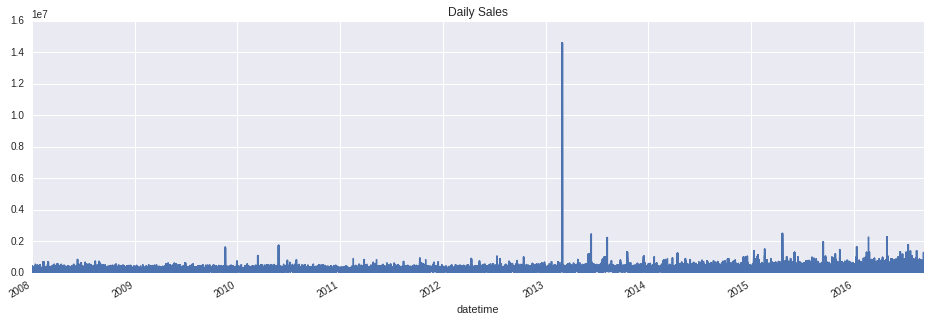

In [77]:
axis = df_wd.SALE_PRICE.plot(figsize=(16, 5))

axis.set_title("Daily Sales");

### Looking at different characteristics of homes in Denver

In [60]:
df_characteristics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131640 entries, 0 to 199731
Data columns (total 46 columns):
PIN                 131640 non-null int64
SCHEDNUM            131640 non-null int64
CD                  131640 non-null int64
OFCARD              131640 non-null int64
OWNER               131640 non-null object
CO_OWNER            2651 non-null object
OWNER_NUM           131640 non-null object
OWNER_DIR           70057 non-null object
OWNER_ST            131640 non-null object
OWNER_TYPE          128336 non-null object
OWNER_APT           4717 non-null object
OWNER_CITY          131640 non-null object
OWNER_STATE         131639 non-null object
OWNER_ZIP           131634 non-null object
SITE_NBR            131640 non-null int64
SITE_DIR            74512 non-null object
SITE_NAME           131640 non-null object
SITE_MODE           131597 non-null object
SITE_MORE           1666 non-null object
TAX_DIST            131640 non-null object
PROP_CLASS          131639 non-null float6

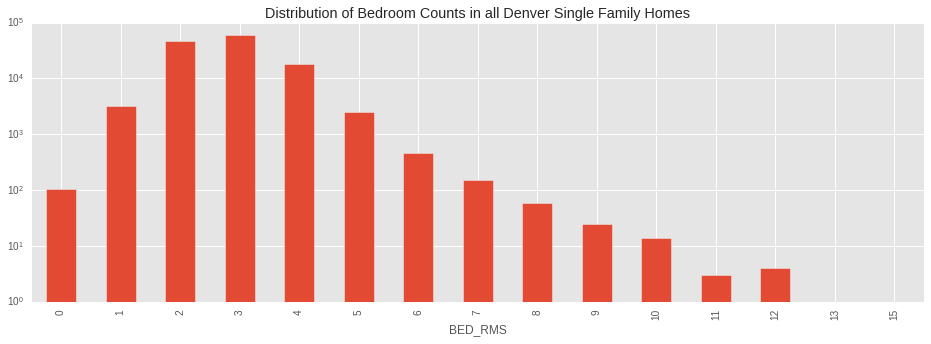

In [90]:
df_characteristics.groupby('BED_RMS').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Distribution of Bedroom Counts in all Denver Single Family Homes', 
                                                  logy=True);

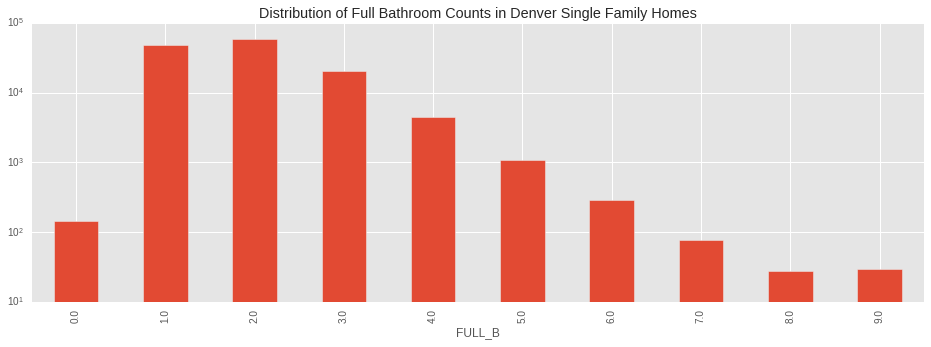

In [89]:
df_characteristics.groupby('FULL_B').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Distribution of Full Bathroom Counts in Denver Single Family Homes', 
                                                  logy=True);

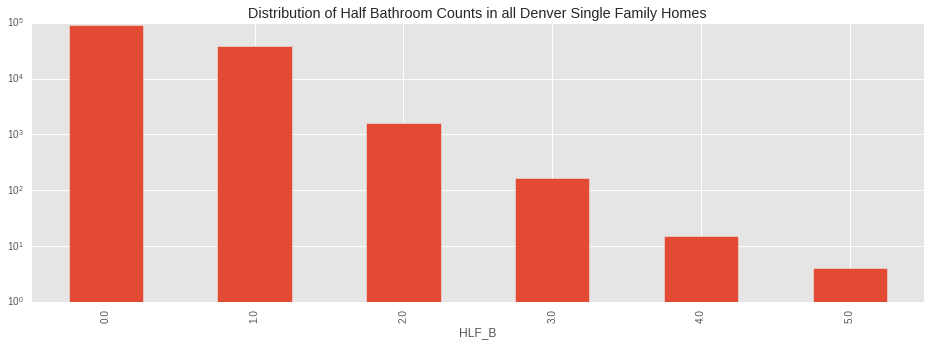

In [88]:
df_characteristics.groupby('HLF_B').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Distribution of Half Bathroom Counts in all Denver Single Family Homes', 
                                                  logy=True);

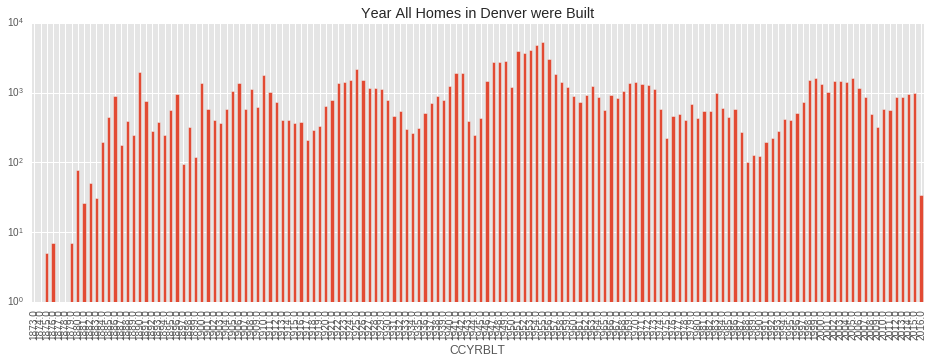

In [92]:
df_characteristics.groupby('CCYRBLT').size().plot(kind='bar', figsize=(16,5), 
                                                  title='Year All Homes in Denver were Built', 
                                                  logy=True);